In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv('./data/Advertising.csv')

In [3]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

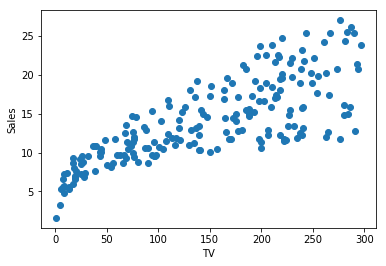

In [7]:
plt.scatter(sales_df.TV, sales_df.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

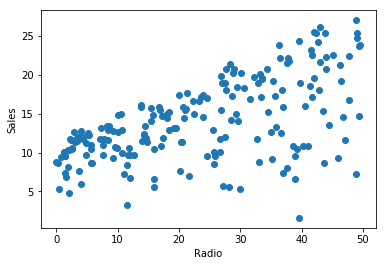

In [8]:
plt.scatter(sales_df.Radio, sales_df.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

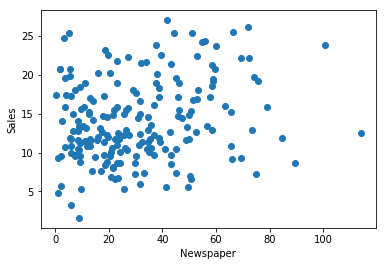

In [9]:
plt.scatter(sales_df.Newspaper, sales_df.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [14]:
col = ['TV','Radio','Newspaper','Sales']
sales_cor_df = sales_df[col]
sales_cor_df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


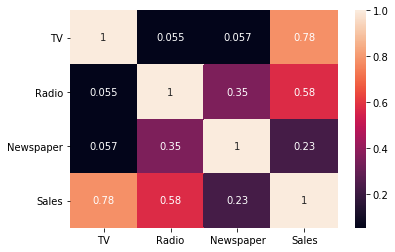

In [16]:
import seaborn as sn
sn.heatmap(sales_cor_df.corr(), annot=True)

    ### Splitting data in train and test
    

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_features = ['TV','Radio','Newspaper']

In [26]:
x_train, x_test,\
y_train, y_test = train_test_split(sales_df[X_features], sales_df.Sales, train_size = 0.8, random_state = 100)

In [27]:
x_train.shape

(160, 3)

In [28]:
x_test.shape

(40, 3)

In [29]:
x_train.head(5)

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lreg_v1 = LinearRegression()

In [35]:
lreg_v1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
lreg_v1.intercept_

2.8172751352950005

In [37]:
lreg_v1.coef_

array([0.0455864 , 0.18569816, 0.00223281])

In [40]:
dict(zip(X_features, lreg_v1.coef_))

{'TV': 0.045586396923019155,
 'Radio': 0.18569815745973392,
 'Newspaper': 0.0022328102410188524}

In [42]:
y_pred = lreg_v1.predict(x_test)

In [43]:
y_pred

array([10.50948755, 20.05723558, 16.82665516, 19.09405782, 20.94383845,
       13.25348896, 11.87554518, 12.4882643 , 20.51420388, 20.91328754,
       10.90182094, 19.44307823,  6.5040246 , 15.3178433 ,  9.04147699,
        8.03952046, 16.26581002, 12.10312044, 17.12086602, 11.28131376,
       17.07036157,  9.84452136, 20.70077487, 17.17479561, 15.19498306,
       21.96631309, 19.1587532 , 10.09216975, 19.40214482, 14.88180369,
       14.27844074,  7.69173892, 10.00183154, 14.82404891,  7.29177732,
       13.63453936,  7.59380446, 11.84106127, 13.61631336, 15.18810875])

In [45]:
y_df_v1 = pd.DataFrame({'actual' : y_test,
                      'predicted' : y_pred,
                      'residual' : y_test - y_pred})

In [46]:
y_df_v1


,actual,predicted,residual
126,6.6,10.509488,-3.909488
104,20.7,20.057236,0.642764
99,17.2,16.826655,0.373345
92,19.4,19.094058,0.305942
111,21.8,20.943838,0.856162
167,12.2,13.253489,-1.053489
116,12.2,11.875545,0.324455
96,11.7,12.488264,-0.788264
52,22.6,20.514204,2.085796
69,22.3,20.913288,1.386712


In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mse_v1 = mean_squared_error(y_df_v1.actual,
                           y_df_v1.predicted)

In [49]:
mse_v1


1.7332927815807728

In [50]:
import numpy as np

In [51]:
rmse_v1 = np.sqrt(mse_v1)

In [52]:
rmse_v1

1.3165457764851067

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_df_v1.actual, y_df_v1.predicted)

0.9184369032278497

### Creating a new variable

In [55]:
x_train['tv_radio'] = x_train['TV'] * x_train['Radio']

In [56]:
x_test['tv_radio'] = x_test['TV'] * x_test['Radio']

In [57]:
X_features = ['TV','Radio','Newspaper','tv_radio']

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lreg_v2= LinearRegression()

In [62]:
lreg_v2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
dict(zip(X_features, lreg_v2.coef_))

{'TV': 0.019565875590254078,
 'Radio': 0.030954329635318047,
 'Newspaper': 0.0033236581656322962,
 'tv_radio': 0.001068939678695226}

In [64]:
y_pred = lreg_v2.predict(x_test)

In [65]:
y_df_v2 = pd.DataFrame({'actual' : y_test,
                      'predicted' : y_pred,
                      'residual' : y_test - y_pred})

In [66]:
from sklearn.metrics import mean_squared_error

In [69]:
mse_v2 = mean_squared_error(y_df_v2.actual,
                           y_df_v2.predicted)

In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_df_v2.actual, y_df_v2.predicted)

0.979948162774217

## CROSS VALIDATION

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
score_v2 = cross_val_score(LinearRegression(),x_train,y_train,cv=5,scoring='r2')

In [75]:
score_v2


array([0.96612485, 0.97087485, 0.96926517, 0.97593387, 0.93389054])

In [76]:
score_v2.mean()

0.9632178551479843

In [77]:
score_v2.std()

0.01500292431852364

### saving the model

In [78]:
from sklearn.externals import joblib

In [79]:
joblib.dump(lreg_v2, 'sales.pkl')

['sales.pkl']

In [81]:
!ls -al

total 1294
drwxr-xr-x 1 dhimate 1049089      0 May 16 13:58 .
drwxr-xr-x 1 dhimate 1049089      0 May 16 12:31 ..
-rw-r--r-- 1 dhimate 1049089    378 Dec  4 20:47 .gitattributes
-rw-r--r-- 1 dhimate 1049089    649 Dec  4 20:47 .gitignore
drwxr-xr-x 1 dhimate 1049089      0 May 16 09:45 .ipynb_checkpoints
-rw-r--r-- 1 dhimate 1049089 356773 May 15 14:18 Analyzing_Cars_1.0.ipynb
-rw-r--r-- 1 dhimate 1049089 566778 Dec  4 20:47 HR_comma_sep.csv
-rw-r--r-- 1 dhimate 1049089  63394 May 15 16:40 Heart_Disease_Analysis.ipynb
-rw-r--r-- 1 dhimate 1049089   1563 May 15 10:46 Program1.ipynb
-rw-r--r-- 1 dhimate 1049089   1380 Dec  4 20:47 README.md
-rw-r--r-- 1 dhimate 1049089  91098 May 16 13:58 Sales_Prediction_1.0.ipynb
-rw-r--r-- 1 dhimate 1049089 129747 May 15 15:44 Stock_Analysis_1.0.ipynb
-rw-r--r-- 1 dhimate 1049089  34558 May 15 11:54 Titanic_Exploration_1.0.ipynb
-rw-r--r-- 1 dhimate 1049089   9166 May 15 11:28 age.png
-rw-r--r-- 1 dhimate 1049089  15278 Dec  4 20:47 check_env_1.0.ipyn